In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, ggtitle, labs

%matplotlib inline

In [2]:
train = pd.read_csv('D:/sravan pc/projects/Project 1/Train_UWu5bXk (2) (1) (1) (1).csv')

In [3]:
test = pd.read_csv('D:/sravan pc/projects/Project 1/Test_u94Q5KV (2) (1) (1) (1).csv')

In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test['Item_Outlet_Sales']=1

In [8]:
dataset = train.append(test)

In [9]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1309.265447
std,4.652502,0.051459,62.086938,8.371664,1699.483470
min,4.555000,0.000000,31.290000,1985.000000,1.000000
25%,8.710000,0.027036,94.012000,1987.000000,1.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
dataset.shape

(14204, 12)

In [11]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
dataset['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [13]:
dataset.Outlet_Size = dataset.Outlet_Size.fillna('medium')

In [14]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
dataset['Item_Weight'].value_counts()
dataset.Item_Weight = dataset.Item_Weight.fillna('medium')

In [16]:
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data visualization

In [17]:
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, labs, theme, stat_smooth, element_text, geom_boxplot

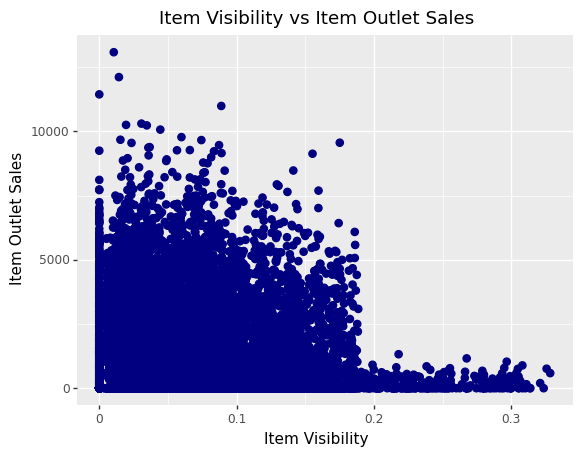

<ggplot: (170153219485)>

In [18]:
 ggplot(dataset)+ aes(x="Item_Visibility", y="Item_Outlet_Sales")+ labs(x="Item Visibility",y="Item Outlet Sales",title="Item Visibility vs Item Outlet Sales",
    )+ geom_point(size = 2.5, color="navy")

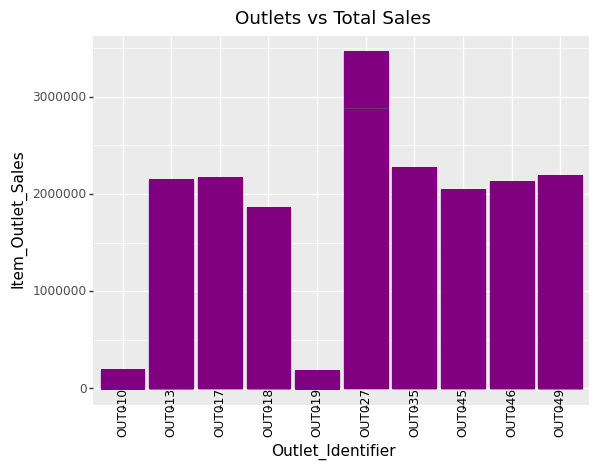

<ggplot: (170154795792)>

In [19]:
ggplot(dataset)+ aes(x='Outlet_Identifier', y='Item_Outlet_Sales') + geom_bar(stat = "identity", color = "purple")+ theme (axis_text_x = element_text(angle = 90, vjust = 0.5, color = "black"))+ ggtitle("Outlets vs Total Sales")


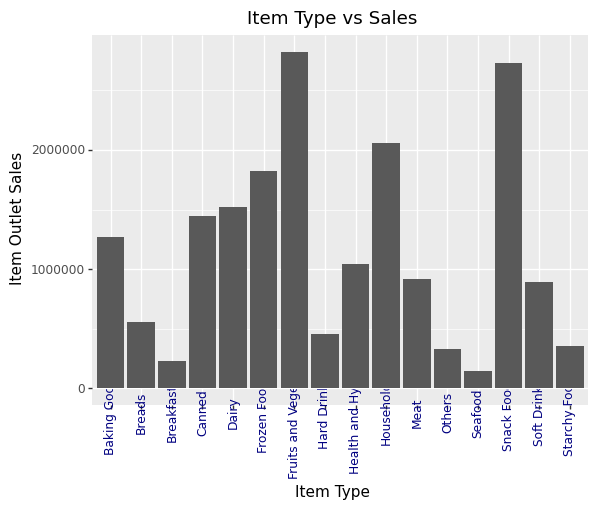

<ggplot: (170154800743)>

In [20]:
ggplot(dataset)+ aes(x='Item_Type',y='Item_Outlet_Sales') + geom_bar( stat = "identity") + labs(x="Item Type" , y="Item Outlet Sales") +ggtitle("Item Type vs Sales")+  theme(axis_text_x = element_text(angle=90, vjust =0.5, color='navy'))

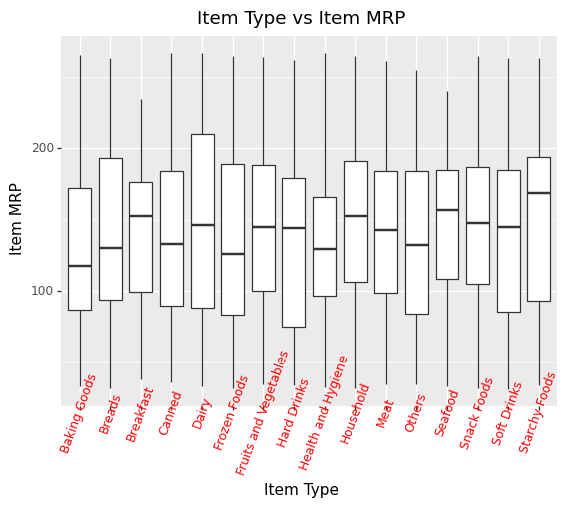

<ggplot: (170154823909)>

In [21]:
ggplot(dataset)+ aes(x='Item_Type',y='Item_MRP') +geom_boxplot() +ggtitle("Box Plot") + theme(axis_text_x = element_text(angle = 70, vjust = 0.5, color = "red")) + labs(x="Item Type" , y="Item MRP") + ggtitle("Item Type vs Item MRP")

# Categorical Variables

In [22]:
test['Item_Outlet_Sales']=1

In [23]:
dataset1=pd.concat([train,test])

In [24]:
dataset1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1.0000
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,1.0000
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1.0000
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,1.0000


In [25]:
dataset1['Item_Weight'].fillna(dataset1['Item_Weight'].median(),inplace = True)

In [26]:
dataset1['Item_Weight'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 14204, dtype: bool

In [27]:
dataset1['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [28]:
dataset1['Item_Visibility']= dataset1.Item_Visibility.fillna(dataset1.Item_Visibility.median())

In [29]:
dataset1['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [30]:
dataset1['Item_Fat_Content'] = dataset1['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
dataset1['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [31]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Manipulation in R

In [32]:
dataset1["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [33]:
# diving items according to Item_Identifier          
def categorize(x):
    if 'FD' in x:
        return 'FD'
    elif 'DR' in x:
        return 'DR'
    elif 'NC' in x:
        return 'NC'
    
dataset1['Item_Type_New'] = dataset1['Item_Identifier'].apply(categorize)

In [34]:
dataset1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [35]:
dataset1=dataset1.drop(['Item_Identifier'],axis=1)

In [36]:
dataset1.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD


In [37]:
dataset1['Years'] = 2013 - dataset1['Outlet_Establishment_Year']

In [38]:
dataset1=dataset1.drop(['Outlet_Establishment_Year'],axis=1)

In [39]:
dataset1.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,4


In [40]:
dataset1['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [41]:
dataset1['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [42]:
dataset1.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,26


# feature engineering

In [43]:
dataset1.pivot_table(values = 'Item_Outlet_Sales',index='Outlet_Size')

,Item_Outlet_Sales
Outlet_Size,
High,1380.093096
Medium,1609.362125
Small,1147.689497


In [44]:
dataset1['Outlet_Size'].describe()

count      10188
unique         3
top       Medium
freq        4655
Name: Outlet_Size, dtype: object

In [45]:
dataset1.pivot_table(values = 'Item_Outlet_Sales',index='Outlet_Location_Type')

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1126.545495
Tier 2,1394.994550
Tier 3,1368.258218


In [46]:
dataset1.pivot_table(values = 'Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,204.297100
Supermarket Type1,1390.258152
Supermarket Type2,1198.215285
Supermarket Type3,2215.875594


In [47]:
dataset1.loc[dataset1['Item_Type_New']=='NC','Item_Fat_Content'] = "Not Edible"

In [48]:
dataset1['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Not Edible    2686
Name: Item_Fat_Content, dtype: int64

In [49]:
dataset1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,Not Edible,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [50]:
dataset1.pivot_table('Item_Outlet_Sales',index='Item_Type_New')

,Item_Outlet_Sales
Item_Type_New,
DR,1212.139207
FD,1330.567652
NC,1275.986024


# Numerical and one hot encoding

In [51]:
dataset1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,Not Edible,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [52]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
dataset1['Outlet_Identifier_n'] = le.fit_transform(dataset1['Outlet_Identifier'])
dataset1['Item_Type_n'] = le.fit_transform(dataset1['Item_Type'])

In [53]:
#One Hot Coding:
dataset1 = pd.get_dummies(dataset1, columns=['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Fat_Content','Item_Type_New'])

In [54]:
dataset1.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Years,Outlet_Identifier_n,Item_Type_n,Outlet_Size_High,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Low Fat,Item_Fat_Content_Not Edible,Item_Fat_Content_Regular,Item_Type_New_DR,Item_Type_New_FD,Item_Type_New_NC
0,9.30,0.016047,Dairy,249.8092,OUT049,3735.1380,14,9,4,0,...,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,Soft Drinks,48.2692,OUT018,443.4228,4,3,14,0,...,0,0,1,0,0,0,1,1,0,0
2,17.50,0.016760,Meat,141.6180,OUT049,2097.2700,14,9,10,0,...,0,1,0,0,1,0,0,0,1,0
3,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,732.3800,15,0,6,0,...,1,0,0,0,0,0,1,0,1,0
4,8.93,0.000000,Household,53.8614,OUT013,994.7052,26,1,9,1,...,0,1,0,0,0,1,0,0,0,1


In [55]:
dataset1.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Item_Outlet_Sales                float64
Years                              int64
Outlet_Identifier_n                int32
Item_Type_n                        int32
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Not Edible        uint8
Item_Fat_Content_Regular           uint8
Item_Type_New_DR                   uint8
Item_Type_New_FD                   uint8
Item_Type_New_NC

In [56]:
#Drop the columns which have been converted to different types:
dataset1.drop(['Item_Type','Outlet_Identifier'],axis=1,inplace=True)

# Model Building

In [57]:
train.shape

(8523, 12)

In [58]:
test.shape

(5681, 12)

In [59]:
row,col = train.shape
print(row)

8523


In [60]:
train1 = dataset1[0:row]
test1 = dataset1[row:]

In [61]:
train1.shape

(8523, 23)

In [62]:
test1.shape

(5681, 23)

In [63]:
X = train1.drop(['Item_Outlet_Sales'], axis=1)
y = train1['Item_Outlet_Sales']

In [64]:
from sklearn.model_selection import train_test_split as split
X_train,X_test,y_train,y_test = split(X,y,test_size = 0.3,shuffle =False)

In [65]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Years,Outlet_Identifier_n,Item_Type_n,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Low Fat,Item_Fat_Content_Not Edible,Item_Fat_Content_Regular,Item_Type_New_DR,Item_Type_New_FD,Item_Type_New_NC
0,9.30,0.016047,249.8092,14,9,4,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,4,3,14,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,17.50,0.016760,141.6180,14,9,10,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,15,0,6,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,8.93,0.000000,53.8614,26,1,9,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [66]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Linear Regression Model:

In [67]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predicting the test set results
pred = regressor.predict(X_test)
m = pd.DataFrame({'Actual':y_test,'Prediction':pred})
m.head()

,Actual,Prediction
5966,96.5410,-316.486001
5967,2306.9970,2487.525224
5968,4996.8290,4204.847031
5969,6897.6880,2932.382374
5970,2308.9944,3138.334733


In [69]:
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score


In [70]:
mse=mean_squared_error(m['Actual'], m['Prediction'])
print("RMSE for Decision Tree")
print(mse**0.5)

RMSE for Decision Tree
1139.1978140631686


In [71]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.38

In [72]:
r2_score(y_train, regressor.predict(X_train))

0.5637930414373953

In [73]:
X_result = test1.drop(['Item_Outlet_Sales'],axis=1)
y_result = test1['Item_Outlet_Sales']

In [74]:
predict = regressor.predict(X_result)
#creating a dataframe for sumbission
lrmodel1 = pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':predict})


In [75]:
lrmodel1.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1845.532326
1,FDW14,OUT017,1616.330742
2,NCN55,OUT010,1861.455161
3,FDQ58,OUT017,2628.193023
4,FDY38,OUT027,5176.533264


In [76]:
#creating a csv file for submission
lrmodel1.to_csv('LinearRegression_prediction_submission.csv')

# Decision Tree Model

In [77]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [78]:
pred1 = regressor.predict(X_test)
m1 = pd.DataFrame({'Actual':y_test,'Prediction':pred1})
m1.head()

,Actual,Prediction
5966,96.5410,205.783689
5967,2306.9970,1114.559421
5968,4996.8290,4017.566618
5969,6897.6880,3108.345100
5970,2308.9944,3108.345100


In [79]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(m1['Actual'], m1['Prediction'])
print("RMSE for Decision Tree")
print(mse1**0.52)

RMSE for Decision Tree
1486.2732285691452


In [80]:
predict1 = regressor.predict(X_result)
#creating a dataframe for sumbission
DecisionTree= pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':predict1})
DecisionTree.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1671.665378
1,FDW14,OUT017,1411.972631
2,NCN55,OUT010,478.434503
3,FDQ58,OUT017,2385.746744
4,FDY38,OUT027,5053.919295


In [81]:
#creating a csv file for submission
DecisionTree.to_csv('DecisionTree_prediction_submission.csv')

# Random Forest Model

In [82]:
from sklearn.ensemble import RandomForestRegressor


model2 = RandomForestRegressor()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
m3 = pd.DataFrame({'Actual':y_test,'Prediction':pred2})
m3.head()



,Actual,Prediction
5966,96.5410,179.799290
5967,2306.9970,1667.835658
5968,4996.8290,4963.252706
5969,6897.6880,3380.872478
5970,2308.9944,3328.687074


In [83]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [84]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(m3['Actual'], m3['Prediction'])
print("RMSE for Random Forest")
print(mse2**0.5)

RMSE for Random Forest
1150.6133083170378


In [85]:
pred2 = regressor.predict(X_result)
#creating a dataframe for sumbission
random_forest= pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':pred2})
random_forest.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1705.301868
1,FDW14,OUT017,1372.104493
2,NCN55,OUT010,607.660230
3,FDQ58,OUT017,2442.105842
4,FDY38,OUT027,6080.244174


In [88]:
#creating a csv file for submission
random_forest.to_csv('random_forest_submission.csv')